In [1]:
SEED=42

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)

In [3]:
FILE_NAME='Tweets.csv'

In [4]:
# Loading data into pandas dataframe
# data = pd.read_csv(FILE_NAME,
#                   usecols=['text', 'airline_sentiment','user_timezone'])

In [5]:
data = pd.read_csv(FILE_NAME)

In [6]:
data.shape

(14640, 15)

In [7]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [8]:
data['airline_sentiment'].value_counts(normalize=True).round(2)

negative    0.63
neutral     0.21
positive    0.16
Name: airline_sentiment, dtype: float64

In [9]:
data['airline'].value_counts(normalize=True).round(4)

United            0.2611
US Airways        0.1990
American          0.1885
Southwest         0.1653
Delta             0.1518
Virgin America    0.0344
Name: airline, dtype: float64

In [10]:
data['retweet_count'].value_counts(normalize=True).round(4)

0     0.9476
1     0.0437
2     0.0045
3     0.0015
4     0.0012
5     0.0003
7     0.0002
6     0.0002
22    0.0001
8     0.0001
32    0.0001
9     0.0001
31    0.0001
18    0.0001
15    0.0001
28    0.0001
44    0.0001
11    0.0001
Name: retweet_count, dtype: float64

### Benchmark

In [11]:
import nltk

In [12]:
#nltk.download('vader_lexicon')

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [14]:
message_text = data.loc[0, 'text']
message_text

'@VirginAmerica What @dhepburn said.'

In [15]:
sid.polarity_scores(message_text)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [16]:
scores = data['text'].apply(lambda x: sid.polarity_scores(x))

In [17]:
scores

0                  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
1                  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2                  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
3          {'neg': 0.246, 'neu': 0.754, 'pos': 0.0, 'compound': -0.5984}
4          {'neg': 0.321, 'neu': 0.679, 'pos': 0.0, 'compound': -0.5829}
5         {'neg': 0.256, 'neu': 0.67, 'pos': 0.074, 'compound': -0.5945}
6           {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.6908}
7          {'neg': 0.16, 'neu': 0.643, 'pos': 0.197, 'compound': 0.1458}
8        {'neg': 0.367, 'neu': 0.415, 'pos': 0.218, 'compound': -0.3477}
9           {'neg': 0.0, 'neu': 0.642, 'pos': 0.358, 'compound': 0.7717}
10         {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.8555}
11          {'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.8863}
12          {'neg': 0.0, 'neu': 0.831, 'pos': 0.169, 'compound': 0.6892}
13                 {'neg': 0.0, 'neu': 1.0, 'pos': 

In [18]:
scores = scores.apply(pd.Series)

In [19]:
scores.head()

,neg,neu,pos,compound
0,0.000,1.000,0.0,0.0000
1,0.000,1.000,0.0,0.0000
2,0.000,1.000,0.0,0.0000
3,0.246,0.754,0.0,-0.5984
4,0.321,0.679,0.0,-0.5829


In [20]:
scores['sentiment'] = data['airline_sentiment']

In [22]:
scores.describe()

,neg,neu,pos,compound
count,14640.000000,14640.000000,14640.000000,14640.000000
mean,0.083874,0.794103,0.122020,0.052895
std,0.111207,0.166741,0.160064,0.456641
min,0.000000,0.102000,0.000000,-0.966800
25%,0.000000,0.693000,0.000000,-0.296000
50%,0.000000,0.808000,0.069000,0.000000
75%,0.147000,0.916250,0.198000,0.438900
max,0.857000,1.000000,0.898000,0.976000


In [21]:
scores.head()

,neg,neu,pos,compound,sentiment
0,0.000,1.000,0.0,0.0000,neutral
1,0.000,1.000,0.0,0.0000,positive
2,0.000,1.000,0.0,0.0000,neutral
3,0.246,0.754,0.0,-0.5984,negative
4,0.321,0.679,0.0,-0.5829,negative


In [ ]:
if compound < threhso_1:
    return 'neg'
elif compiunf > threh_2:
    return 'pos'
else:
    return 'neu'

In [23]:
scores['sentiment'].value_counts(normalize=True)

negative    0.626913
neutral     0.211680
positive    0.161407
Name: sentiment, dtype: float64

In [ ]:
scores.describe()

In [25]:
for threshold in [x/100 for x in range(-100,100,1)]:
    print(threshold)

-1.0
-0.99
-0.98
-0.97
-0.96
-0.95
-0.94
-0.93
-0.92
-0.91
-0.9
-0.89
-0.88
-0.87
-0.86
-0.85
-0.84
-0.83
-0.82
-0.81
-0.8
-0.79
-0.78
-0.77
-0.76
-0.75
-0.74
-0.73
-0.72
-0.71
-0.7
-0.69
-0.68
-0.67
-0.66
-0.65
-0.64
-0.63
-0.62
-0.61
-0.6
-0.59
-0.58
-0.57
-0.56
-0.55
-0.54
-0.53
-0.52
-0.51
-0.5
-0.49
-0.48
-0.47
-0.46
-0.45
-0.44
-0.43
-0.42
-0.41
-0.4
-0.39
-0.38
-0.37
-0.36
-0.35
-0.34
-0.33
-0.32
-0.31
-0.3
-0.29
-0.28
-0.27
-0.26
-0.25
-0.24
-0.23
-0.22
-0.21
-0.2
-0.19
-0.18
-0.17
-0.16
-0.15
-0.14
-0.13
-0.12
-0.11
-0.1
-0.09
-0.08
-0.07
-0.06
-0.05
-0.04
-0.03
-0.02
-0.01
0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83

In [26]:

def find_threshold(score,
                   actual_distribution={'negative':0.63,
                                       'neutral':0.21,
                                       'positive':0.16},
                  ):
    
    total = len(score)
    
    for threshold in [x/100 for x in range(-100,100,1)]:
        total_negatives = sum(score < threshold)
        if abs(total_negatives/total - actual_distribution['negative']) <= 0.01:
            negative_threshold = threshold
            break
    
    for threshold in [x/100 for x in range(int(negative_threshold*100),100,1)]:
        total_neutral = len(np.where((score >= negative_threshold) & (score <=threshold))[0])
        if abs(total_neutral/total - actual_distribution['neutral']) <= 0.01:
            neutral_threshold = threshold
            break
            
    return negative_threshold, neutral_threshold

In [27]:
find_threshold(scores['compound'].values)

(0.18, 0.55)

In [29]:
len(scores['compound'])

14640

In [30]:
negative_threshold = np.quantile(scores['compound'], 0.63)
negative_threshold

0.2023

In [31]:
np.quantile(scores['compound'], 0.63+0.21)

0.5766

In [32]:

def find_threshold1(score,
                   actual_distribution={'negative':0.63,
                                       'neutral':0.21,
                                       'positive':0.16},
                  ):
    
    negative = actual_distribution['negative']
    neutral = negative + actual_distribution['neutral']
    
    negative_threshold = np.quantile(score, negative)
    neutral_threshold = np.quantile(score, neutral)
    
    return negative_threshold, neutral_threshold


In [ ]:
find_threshold1(scores['compound'].values)

In [ ]:
import time
start = time.time()
find_threshold(scores['compound'].values)
end = time.time()
print("{:.2f} seconds".format(end-start))

In [ ]:
import time
start = time.time()
find_threshold1(scores['compound'].values)
end = time.time()
print("{:.4f} seconds".format(end-start))

In [33]:
scores['p_sentiment'] = pd.cut(scores['compound'],
                             bins=[-1,0.2023,0.5766,1],
                             labels=['negative','neutral','positive'])

In [35]:
scores.head()

,neg,neu,pos,compound,sentiment,p_sentiment
0,0.000,1.000,0.0,0.0000,neutral,negative
1,0.000,1.000,0.0,0.0000,positive,negative
2,0.000,1.000,0.0,0.0000,neutral,negative
3,0.246,0.754,0.0,-0.5984,negative,negative
4,0.321,0.679,0.0,-0.5829,negative,negative


In [36]:
scores['flag'] = scores['p_sentiment']==scores['sentiment']

In [37]:
scores['flag'].mean()

0.6221994535519125

In [38]:
scores.groupby(by='p_sentiment')['flag'].agg(['mean','count']).round(2)

,mean,count
p_sentiment,,
negative,0.76,9268
neutral,0.27,3030
positive,0.54,2342


Build benchmark with countvectorizer and tdidfvectorizer

In [39]:
def vader(text_col, sentiment_col):
    scores = data[text_col].apply(lambda x: sid.polarity_scores(x)).apply(pd.Series)
    scores['sentiment'] = data[sentiment_col]
    negative_t, neutral_t = find_threshold1(scores['compound'].values)
    scores['p_sentiment'] = pd.cut(scores['compound'],
                             bins=[-1,negative_t,neutral_t,1],
                             labels=['negative','neutral','positive'])
    
    scores['flag'] = scores['p_sentiment']==scores['sentiment']
    print(scores['p_sentiment'].value_counts(normalize=True))
    print(f"Overall Accuracy: {scores['flag'].mean()}")
    print("\n")
    print(scores.groupby(by='p_sentiment')['flag'].agg(['mean','count']).round(2))

In [ ]:
vader('text', 'airline_sentiment')

### Processing

In [40]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import re
import unicodedata
import contractions
from bs4 import BeautifulSoup

In [41]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

def tokenize_text(text):
    return nltk.word_tokenize(text)

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos='v'))
        
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words


def normalize(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    words = tokenize_text(text)
    
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

In [44]:
from nltk.corpus import stopwords 
stopwords = stopwords.words('english')

In [45]:
'not' in stopwords

True

In [46]:
from nltk.corpus import stopwords   
stopwords = stopwords.words('english')

stopwords.remove('not')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

stopwords = list(set(stopwords) - set(customlist))

lemmatizer = WordNetLemmatizer()

In [47]:
from pandarallel import pandarallel
pandarallel.initialize()

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [48]:
data['Text_p'] = data.parallel_apply(lambda row: normalize(row['text']), axis=1)

In [49]:
vader('Text_p', 'airline_sentiment')

negative    0.629986
neutral     0.212500
positive    0.157514
Name: p_sentiment, dtype: float64
Overall Accuracy: 0.6134562841530055


             mean  count
p_sentiment             
negative     0.75   9223
neutral      0.26   3111
positive     0.52   2306


### Build count and tfidf

In [115]:
X = data['text']
y = data.airline_sentiment

In [116]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)


In [ ]:
!python3 -m pip install xgboost #lightgbm by microsoft; catboost by yandex

#ios
#brew install libomp

In [52]:
import xgboost as xgb

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer.get_feature_names()

In [54]:
vectorizer = CountVectorizer(max_features=500)
# vectorizer.fit(X_train)
# X_train_features = vectorizer.transform(X_train)
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

In [ ]:

# from scipy import sparse

# training_data = sparse.hstack((X_train_features, data.head(X_train_features.shape[0])[['airline_sentiment_confidence']].values))



In [55]:
X_train_features.shape

(10248, 500)

In [59]:
model = xgb.XGBClassifier(max_depth=3)

In [60]:
model.fit(X_train_features, y_train)

[21:46:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
model.score(X_train_features, y_train), model.score(X_test_features, y_test)

(0.7987900078064013, 0.7866575591985429)

In [ ]:
data_features = vectorizer.transform(data['text'])

In [ ]:
data['sentiment_p'] = model.predict(data_features)

In [ ]:
data['flag'] = data['sentiment_p']==data['airline_sentiment']

In [ ]:
print(f"Overall Accuracy: {data['flag'].mean():.2%}")
print("\n")
print(data.groupby(by='sentiment_p')['flag'].agg(['mean','count']).round(2))

In [63]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.00192141, 0.        ,
       0.00202447, 0.        , 0.00078565, 0.        , 0.00062048,
       0.        , 0.00074506, 0.        , 0.00260587, 0.        ,
       0.        , 0.0034119 , 0.00101759, 0.0053691 , 0.00299241,
       0.00265276, 0.        , 0.        , 0.00510657, 0.00058214,
       0.00098828, 0.        , 0.00215365, 0.        , 0.00153807,
       0.        , 0.00254355, 0.00099254, 0.0116342 , 0.        ,
       0.00161851, 0.00077979, 0.00197204, 0.0070315 , 0.        ,
       0.00240974, 0.00526434, 0.00179906, 0.        , 0.        ,
       0.00338662, 0.00103055, 0.0012664 , 0.        , 0.00069941,
       0.00217005, 0.        , 0.        , 0.        , 0.01035689,
       0.00035354, 0.0008878 , 0.00402487, 0.00531091, 0.        ,
       0.00508989, 0.        , 0.00110216, 0.00735145, 0.00806377,
       0.00104015, 0.003368  , 0.00983438, 0.00218841, 0.00188047,
       0.00266916, 0.00098972, 0.        , 0.        , 0.     

In [62]:
len(model.feature_importances_)

500

In [64]:
feature_imp = pd.DataFrame(zip(model.feature_importances_, vectorizer.get_feature_names()),
                          columns=['importance', 'word'])

In [66]:
feature_imp.sort_values(by='importance', ascending=False).head(9)

,importance,word
402,0.041039,thank
403,0.031393,thanks
191,0.017600,great
217,0.015599,hours
216,0.013649,hour
294,0.013518,no
236,0.012479,jetblue
100,0.012478,co
133,0.012047,dm


In [ ]:
#import shap
#use this for features importance by every class

In [ ]:
feature_imp.sort_values(by='importance', ascending=False).head(9)

In [ ]:
import shap
shap_values = shap.TreeExplainer(rf)
shap.summary_plot(shap_values.shap_values(X), X)
shap.summary_plot(shap_values.shap_values(X), plot_type="bar", feature_names=X.columns)
shap_values_Model = shap_values.shap_values(X)
shap.initjs()
shap.force_plot(shap_values.expected_value,
                shap_values_Model[0],
                X.iloc[0]
               )

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500)
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

model = xgb.XGBClassifier()

model.fit(X_train_features, y_train)

print(model.score(X_train_features, y_train), model.score(X_test_features, y_test))

data_features = vectorizer.transform(data['text'])

data['sentiment_p'] = model.predict(data_features)

data['flag'] = data['sentiment_p']==data['airline_sentiment']

print(f"Overall Accuracy: {data['flag'].mean():.2%}")
print("\n")
print(data.groupby(by='sentiment_p')['flag'].agg(['mean','count']).round(2))

feature_imp = pd.DataFrame(zip(model.feature_importances_, vectorizer.get_feature_names()),
                          columns=['importance', 'word'])

print(feature_imp.sort_values(by='importance', ascending=False).head(9))

[22:26:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9042740046838408 0.7839253187613844
Overall Accuracy: 86.82%


             mean  count
sentiment_p             
negative     0.89   9888
neutral      0.80   2766
positive     0.88   1986
     importance     word
402    0.028382    thank
403    0.016013   thanks
191    0.012708    great
211    0.012564     hold
217    0.012059    hours
33     0.011472  amazing
216    0.009504     hour
119    0.008978  delayed
67     0.007941     best


In [118]:
import shap
shap_values = shap.TreeExplainer(model)
#shap.summary_plot(shap_values.shap_values(X), X)
#shap.summary_plot(shap_values.shap_values(X), plot_type="bar", feature_names=X.columns)
shap_values_Model = shap_values.shap_values(X_test_features)


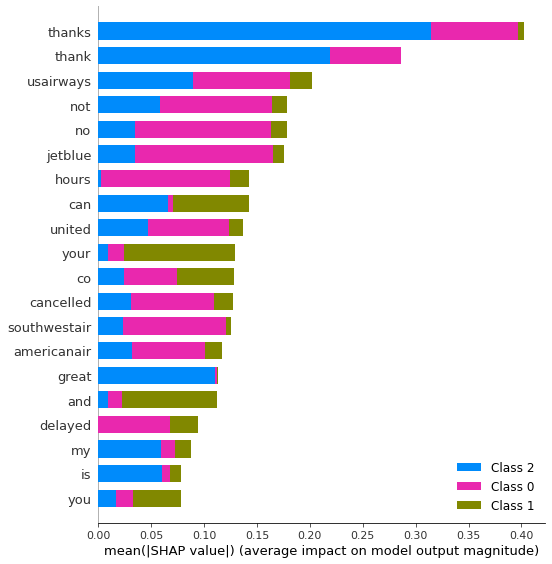

In [126]:
shap.summary_plot(shap_values.shap_values(X_test_features), X_test_features, feature_names=vectorizer.get_feature_names())


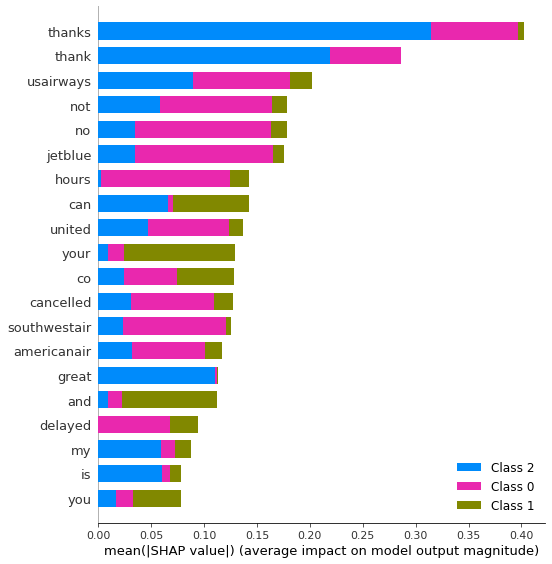

In [127]:
shap.summary_plot(shap_values.shap_values(X_test_features), plot_type="bar", feature_names=vectorizer.get_feature_names())

In [120]:
X_test_features[0]

<1x500 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [124]:
shap.initjs()
shap.force_plot(shap_values.expected_value,
                shap_values_Model[0],
                X_test_features[0]
               )

Exception: In v0.20 force_plot now requires the base value as the first parameter! Try shap.force_plot(explainer.expected_value, shap_values) or for multi-output models try shap.force_plot(explainer.expected_value[0], shap_values[0]).

In [68]:
pd.crosstab(data['airline'],
           data['airline_sentiment'],
           margins=True,
           normalize='index'
           )

airline_sentiment,negative,neutral,positive
airline,,,
American,0.710402,0.167814,0.121783
Delta,0.429793,0.325383,0.244824
Southwest,0.490083,0.274380,0.235537
US Airways,0.776862,0.130793,0.092345
United,0.688906,0.182365,0.128728
Virgin America,0.359127,0.339286,0.301587
All,0.626913,0.211680,0.161407


In [71]:
top_timezones=['Eastern Time (US & Canada)','Central Time (US & Canada)','Pacific Time (US & Canada)',
             'Quito','Atlantic Time (Canada)']
data['user_timezone_p'] = np.where(data['user_timezone'].isin(top_timezones),
                               data['user_timezone'],
                               'Other')

In [72]:
pd.crosstab(data['user_timezone_p'],
           data['airline_sentiment'],
           margins=True,
           normalize='index')

airline_sentiment,negative,neutral,positive
user_timezone_p,,,
Atlantic Time (Canada),0.601610,0.241449,0.156942
Central Time (US & Canada),0.616779,0.198343,0.184878
Eastern Time (US & Canada),0.617788,0.205395,0.176816
Other,0.633548,0.219258,0.147194
Pacific Time (US & Canada),0.596026,0.218543,0.185430
Quito,0.708672,0.180217,0.111111
All,0.626913,0.211680,0.161407


In [73]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,Text_p,sentiment_p,flag,user_timezone_p
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica dhepburn say,neutral,True,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),virginamerica plus add commercials experience tacky,positive,True,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),virginamerica not today must mean need take another trip,neutral,True,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),virginamerica really aggressive blast obnoxious entertainment guests face little recourse,negative,True,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),virginamerica really big bad thing,negative,True,Pacific Time (US & Canada)


In [76]:
data['Text_l'] = data['Text_p'].str.len()

In [78]:
data.groupby(by='airline_sentiment')['Text_l'].agg(['mean','count'])

,mean,count
airline_sentiment,,
negative,72.303334,9178
neutral,57.265570,3099
positive,57.510368,2363


In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500)
X_train_features = vectorizer.fit_transform(X_train)

In [ ]:
X

In [ ]:
X_train_features + [other_features]

In [ ]:

# from scipy import sparse

# training_data = sparse.hstack((X_train_features, data[['airline_sentiment_confidence']].values))



In [84]:
type(X_train_features)

scipy.sparse.csr.csr_matrix

In [ ]:
vectorizer.get_feature_names()

In [ ]:
type(X_train_features.toarray())

In [ ]:
X_train_features_df = pd.DataFrame(X_train_features.toarray(),
                                  columns=vectorizer.get_feature_names()
                                  )

In [ ]:
X_train_features_df.shape

In [ ]:
X_train_features_df.head()

In [81]:
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer

In [82]:
pf = PolynomialFeatures(degree=1,
                        include_bias=False
                       )

In [80]:
data.head(1)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,Text_p,sentiment_p,flag,user_timezone_p,Text_l
0,570306133677760513,neutral,1.0,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica dhepburn say,neutral,True,Eastern Time (US & Canada),26


In [101]:
column_trans = ColumnTransformer([('user_timezone', OneHotEncoder(),['user_timezone_p']),
                                  ('airline', OneHotEncoder(),['airline']),
                                  ('text_length', pf, ['Text_l']),
                                  ('text_features', TfidfVectorizer(max_features=500), 'Text_p')
                                 ],
                                 remainder='drop',
                                n_jobs=-1
                                )

In [108]:
column_trans = ColumnTransformer([('user_timezone', OneHotEncoder(),['user_timezone_p']),
                                  ('airline', OneHotEncoder(),['airline']),
                                  ('text_length', pf, ['Text_l']),
                                  #('text_features', TfidfVectorizer(max_features=500), 'Text_p')
                                 ],
                                 remainder='drop',
                                n_jobs=-1
                                )

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=SEED)

In [110]:
type(X_train)

pandas.core.frame.DataFrame

In [111]:
#vectorizer = TfidfVectorizer(max_features=500)
X_train_features = column_trans.fit_transform(X_train)
X_test_features = column_trans.transform(X_test)
type(X_train_features)

scipy.sparse.csr.csr_matrix

In [89]:
column_trans.get_feature_names()

['user_timezone__x0_Atlantic Time (Canada)',
 'user_timezone__x0_Central Time (US & Canada)',
 'user_timezone__x0_Eastern Time (US & Canada)',
 'user_timezone__x0_Other',
 'user_timezone__x0_Pacific Time (US & Canada)',
 'user_timezone__x0_Quito',
 'airline__x0_American',
 'airline__x0_Delta',
 'airline__x0_Southwest',
 'airline__x0_US Airways',
 'airline__x0_United',
 'airline__x0_Virgin America',
 'text_length__x0',
 'text_features__aa',
 'text_features__able',
 'text_features__account',
 'text_features__actually',
 'text_features__add',
 'text_features__address',
 'text_features__agent',
 'text_features__agents',
 'text_features__ago',
 'text_features__air',
 'text_features__airline',
 'text_features__airlines',
 'text_features__airport',
 'text_features__airways',
 'text_features__allow',
 'text_features__almost',
 'text_features__already',
 'text_features__also',
 'text_features__always',
 'text_features__amaze',
 'text_features__american',
 'text_features__americanair',
 'text_fe

In [105]:
X_train_features

<10248x513 sparse matrix of type '<class 'numpy.float64'>'
	with 103035 stored elements in Compressed Sparse Row format>

In [ ]:
feature_imp[feature_imp['word'].isin(['text_legnth__x0','user_timezone__x0_Quito'])]

In [112]:
model = xgb.XGBClassifier(max_depth=5)

model.fit(X_train_features, y_train)

print(model.score(X_train_features, y_train), model.score(X_test_features, y_test))

data_features = column_trans.transform(data)

data['sentiment_p'] = model.predict(data_features)

data['flag'] = data['sentiment_p']==data['airline_sentiment']

print(f"Overall Accuracy: {data['flag'].mean():.2%}")
print("\n")
print(data.groupby(by='sentiment_p')['flag'].agg(['mean','count']).round(2))

feature_imp = pd.DataFrame(zip(model.feature_importances_, column_trans.get_feature_names()),
                          columns=['importance', 'word'])

print(feature_imp.sort_values(by='importance', ascending=False).head(9))

/Users/vinodgattani/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:22:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.6854020296643247 0.6555100182149363
Overall Accuracy: 67.64%


             mean  count
sentiment_p             
negative     0.71  12164
neutral      0.52   1749
positive     0.54    727
    importance                                      word
11    0.156243                airline__x0_Virgin America
9     0.114770                    airline__x0_US Airways
7     0.113777                         airline__x0_Delta
8     0.099765                     airline__x0_Southwest
10    0.095468                        airline__x0_United
12    0.085456                           text_length__x0
6     0.082647                      airline__x0_American
0     0.046999  user_timezone__x0_Atlantic Time (Canada)
5     0.045033

In [107]:
model = xgb.XGBClassifier(max_depth=5)

model.fit(X_train_features, y_train)

print(model.score(X_train_features, y_train), model.score(X_test_features, y_test))

data_features = column_trans.transform(data)

data['sentiment_p'] = model.predict(data_features)

data['flag'] = data['sentiment_p']==data['airline_sentiment']

print(f"Overall Accuracy: {data['flag'].mean():.2%}")
print("\n")
print(data.groupby(by='sentiment_p')['flag'].agg(['mean','count']).round(2))

feature_imp = pd.DataFrame(zip(model.feature_importances_, column_trans.get_feature_names()),
                          columns=['importance', 'word'])

print(feature_imp.sort_values(by='importance', ascending=False).head(9))

/Users/vinodgattani/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:21:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8585089773614364 0.7789162112932605
Overall Accuracy: 83.46%


             mean  count
sentiment_p             
negative     0.86  10058
neutral      0.74   2610
positive     0.83   1972
     importance                  word
443    0.019197  text_features__thank
198    0.018084  text_features__great
174    0.016710  text_features__fleek
32     0.013617  text_features__amaze
222    0.010256  text_features__hours
273    0.009766   text_features__love
214    0.009473   text_features__hold
122    0.009138  text_features__delay
226    0.008921   text_features__http


In [113]:
feature_imp = pd.DataFrame(zip(model.feature_importances_, column_trans.get_feature_names()),
                          columns=['importance', 'word'])

print(feature_imp.sort_values(by='importance', ascending=False).head(9))

    importance                                      word
11    0.156243                airline__x0_Virgin America
9     0.114770                    airline__x0_US Airways
7     0.113777                         airline__x0_Delta
8     0.099765                     airline__x0_Southwest
10    0.095468                        airline__x0_United
12    0.085456                           text_length__x0
6     0.082647                      airline__x0_American
0     0.046999  user_timezone__x0_Atlantic Time (Canada)
5     0.045033                   user_timezone__x0_Quito


- https://programminghistorian.org/en/lessons/sentiment-analysis
- https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/analyze-tweet-sentiment-in-python/
- https://quantdare.com/introduction-to-nlp-sentiment-analysis-and-wordclouds/

In [ ]:
data['name'].nunique()

In [ ]:
data.head()

In [ ]:
import shap
shap_values = shap.TreeExplainer(rf)
shap.summary_plot(shap_values.shap_values(X), X)
shap.summary_plot(shap_values.shap_values(X), plot_type="bar", feature_names=X.columns)
shap_values_Model = shap_values.shap_values(X)
shap.initjs()
shap.force_plot(shap_values.expected_value,
                shap_values_Model[0],
                X.iloc[0]
               )

- Features
    - Tweet time from flight time
    - user history
- generally, historical data not so significant

- pre-trained models on twitter sentiment
- google APIs
- Different algorithms to generate word vectors: Word2vec; Glove; DNN

Summary:

- We used dataset which has tweets in text format and their sentiment type (positive, negative and neutral).
- The goal was to build a model for text-classification.
- We Pre-processed the data using variuos techniques and libraries.
- The pre-precessed data is converted to numbers, so that we can feed the data in the model.
- After building the classification model, we predicted the result for the test data.
- After that we saw that using the above techniques, our model performed good in perspective of how the text classification models perform.
- One more way to increase accuracy is to use different variations of Pre-processing techniques.

In [ ]:
#semantic meaning
#syntatic

In [ ]:
#word2ve

In [ ]:
The goal was to build a model for text-classification.

The goal was to build a model for text-classification.